In [1]:
# Linear regression example - predict temperature of water based on salinity
# Source: https://machinelearningknowledge.ai/linear-regression-in-python-sklearn-with-example/

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing #, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [13]:
# This database contains oceanographic data measured from seawater samples collected at CalCOFI stations. Oceanographic data (i.e. the physical features of seawater) includes parameters such as temperature, salinity, dissolved oxygen, chlorophyll-a, nutrients, and many more
# https://calcofi.org/data/oceanographic-data/bottle-database/

df = pd.read_csv('bottle.csv', index_col=None, header=0, encoding='latin-1', low_memory=False) 

In [3]:
# Display first records of data frame
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_DYNHT,R_Nuts,R_Oxy_µmol/Kg,DIC1,DIC2,TA1,TA2,pH1,pH2,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Work with first 500 rows - NOTE that this affects our accuracy...

#df = df[:][:500]

# Remove columns other than salinity and temperature
df = df[['Salnty', 'T_degC']]

df

,Salnty,T_degC
0,33.4400,10.500
1,33.4400,10.460
2,33.4370,10.460
3,33.4200,10.450
4,33.4210,10.450
...,...,...
889495,33.4849,15.599
889496,33.4857,15.570
889497,33.4824,15.434
889498,33.4725,15.347


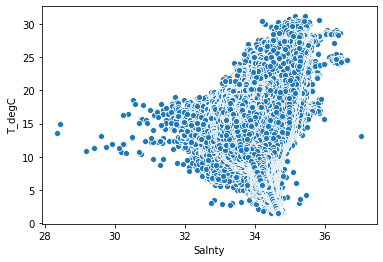

In [15]:
# Create scatterplot of salinity and temperature using seaborn

sns.scatterplot(x ="Salnty", y ="T_degC", data = df) 

In [16]:
# fill null values by propagating previous value forward
df.fillna(method ='ffill', inplace = True)

In [17]:
# reshape arrays 

X = np.array(df['Salnty']).reshape(-1, 1) 
y = np.array(df['T_degC']).reshape(-1, 1)

In [18]:
# test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [19]:
# train linear regression model

regr = LinearRegression() 
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Evaluate training score
# This is R2 (squared), so 0 = no prediction, 1 = perfect prediction

train_score = regr.score(X_train, y_train)
print("The training score of model is: ", train_score)

The training score of model is:  0.209564020695443


In [21]:
# Evaluate test score
test_score = regr.score(X_test, y_test)
print("The score of the model on test data is:", test_score )

The score of the model on test data is: 0.21086029251477512


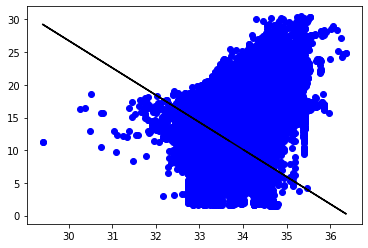

In [22]:
# Visualize result
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 

In [23]:
# KNN in sklearn example - predict if a child will play outside based on weather and temperature
# https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

# Create a dataset manually. Weather may be sunny, overcast, or rainy; temp may be hot, mild, or cool; play will be yes or no

# Assigning features and label variables
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [24]:
# Use sklearn label encoder to convert each text value to a number

# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
# For weather, 0 = Overcast, 1 = Rainy, 2 = Sunny
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [25]:
# Converting string labels into numbers for temp and play (which becomes label, since it's our "outcome")
# For temp, 0 = Cool, 1 = Hot, 2 = Mild
temp_encoded=le.fit_transform(temp)
print(temp_encoded)

# For play, 0 = no, 1 = yes
label=le.fit_transform(play)
print(label)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [26]:
# Combine weather and temperature into single list of tuples

features=list(zip(weather_encoded,temp_encoded))

In [27]:
# Display combined features [weather, temp]
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [28]:
# Create KNN classifer and train model

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [31]:
#Predict Output for an overcast, mild day
predicted= model.predict([[2,1]]) # 0:Overcast, 2:Mild
print(predicted)

# 1 is yes (play), 0 is no (don't play)

[0]


In [42]:
# KNN with multiple classes/labels
# Source: https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

# import wine database - details at https://archive.ics.uci.edu/ml/datasets/wine

#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [33]:
# print the names of the features (characteristics of the different wines)
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [34]:
# print the label wine names(class_0, class_1, class_2)
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [35]:
# print the wine data (top 5 records)
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [36]:
# print the wine target labels (0:Class_0, 1:Class_1, 2:Class_3)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [37]:
# print data(feature)shape (rows, columns)
print(wine.data.shape)

(178, 13)


In [38]:
# print target(or label)shape (only rows, since only one column)
print(wine.target.shape)

(178,)


In [43]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# If you specify a particular random state here, you can reproduce test/train splits for comparison purposes
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3) # 70% training and 30% test

In [44]:
# start with K = 9

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [45]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7962962962962963


In [46]:
# Decision Tree Classifier - predict Titanic survival

# source: https://datagy.io/sklearn-decision-tree-classifier/

# Downloading and exploring the Titanic dataset - will only use certain columns
import pandas as pd

titanic_data = pd.read_csv("titanic.csv", usecols=['Survived', 'Pclass', 'Sex', 'Age'])

# drop nulls
titanic_data = titanic_data.dropna()

# encode sex as 0 or 1

titanic_data = titanic_data.replace(['female'],'0')
titanic_data = titanic_data.replace(['male'],'1')

In [47]:
# Encode survived as numeric categories

titanic_data['Survived'] = titanic_data['Survived'].replace(to_replace=0, value='no')
titanic_data['Survived'] = titanic_data['Survived'].replace(to_replace=1, value='yes')

In [48]:
# Visualize first couple of rows

print(titanic_data.head())

  Survived  Pclass Sex   Age
0       no       3   1  22.0
1      yes       1   0  38.0
2      yes       3   0  26.0
3      yes       1   0  35.0
4       no       3   1  35.0


In [49]:
# Populate data in X array and label (survived) in y array

X = titanic_data.copy()
y = X.pop('Survived')

In [50]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split

# specifying random state would allow us to compare different attempts with a consistent test/train split
# "default" split is 75% train/25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [51]:
# How to Import the DecisionTreeClassifer Class
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(
    criterion='gini', 
    splitter='best', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None
)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [52]:
# Creating Our First Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [53]:
# Making Predictions with Our Model

predictions = clf.predict(X_test)
print(predictions[:5])

['no' 'yes' 'no' 'no' 'no']


In [54]:
# Measuring the accuracy of our model

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.8468468468468469


|--- feature_1 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_2 <= 3.00
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- class: no
|   |   |   |--- feature_0 >  1.50
|   |   |   |   |--- class: yes
|   |   |--- feature_2 >  3.00
|   |   |   |--- feature_2 <= 26.50
|   |   |   |   |--- feature_2 <= 24.50
|   |   |   |   |   |--- class: yes
|   |   |   |   |--- feature_2 >  24.50
|   |   |   |   |   |--- feature_2 <= 25.50
|   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |--- feature_2 >  25.50
|   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |   |   |--- class: no
|   |   |   |--- feature_2 >  26.50
|   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |--- class: yes
|   |   |   |   |--- feature_0 >  1.50
|  

[Text(111.08713235294118, 209.07692307692307, 'X[1] <= 0.5\ngini = 0.476\nsamples = 664\nvalue = [404, 260]'),
 Text(44.47058823529412, 192.35076923076923, 'X[0] <= 2.5\ngini = 0.389\nsamples = 231\nvalue = [61, 170]'),
 Text(12.07058823529412, 175.62461538461537, 'X[2] <= 3.0\ngini = 0.066\nsamples = 117\nvalue = [4, 113]'),
 Text(5.082352941176471, 158.89846153846153, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(2.5411764705882356, 142.1723076923077, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(7.623529411764707, 142.1723076923077, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(19.058823529411768, 158.89846153846153, 'X[2] <= 26.5\ngini = 0.051\nsamples = 115\nvalue = [3, 112]'),
 Text(12.705882352941178, 142.1723076923077, 'X[2] <= 24.5\ngini = 0.1\nsamples = 38\nvalue = [2, 36]'),
 Text(10.164705882352942, 125.44615384615385, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(15.247058823529414, 125.44615384615385, 'X[2] <= 25.5\ngini = 0.444\nsamples = 6

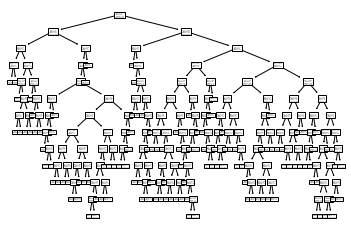

In [55]:
# Create a text representation of the tree

from matplotlib import pyplot as plt
from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)

tree.plot_tree(clf)

In [56]:
# Use graphviz to make a nicer looking tree
# https://graphviz.org/
# Requires a bit of setup - on Windows, have to install both Python library and Windows program; Windows program must be on system path

import graphviz 
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=titanic_data['Survived'], out_file=None) 

In [57]:
# Render the tree and save as a PDF
# This link will help interpret: https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952

graph = graphviz.Source(dot_data) 

graph.render("titanic")

'titanic.pdf'